# PaperMage
## Quick start demo

`papermage` is a toolkit that allows **processing**, **representing**, and **manipulating** visually-rich scientific documents. 

With `papermage`, you can:
1. Parse a PDF into a structured representation of its elements
2. Interactively traverse the document structure across different levels of granularity (e.g., pages, paragraphs, sentences, etc.) and modalities (e.g., text, figures, tables, etc.)
3. Implement custom models (we call them `Predictors`) to further analyze documents (i.e., add more `Layers`)
4. Quickly vizualize the results of your models in a notebook (as we are about to do!)

<p align="center">
    <img src="res/fig1.png" width="500">
</p>


In [1]:
# helper function to get current working directory
from IPython import get_ipython # type: ignore
import os
pwd = os.path.abspath(get_ipython().run_line_magic("pwd", ""))  # type: ignore
s.path.abspath(get_ipython().run_line_magic("pwd", ""))  # type: ignore

First, let's familiarize with the core data classes --- Document, Layers, and Entities.

In [2]:
from papermage.magelib import Document

doc = Document("This is a sentence. This is another sentence.")

In [3]:
doc.symbols

'This is a sentence. This is another sentence.'

But documents are highly-structured! Let's see how that comes into play with a real document.

## Using Recipes to get Documents

Documents are annoying to build from scratch. But we don't have to! Let's use a predefined recipe:

In [27]:
import pathlib
from papermage.recipes import CoreRecipe
fixture_path = pathlib.Path(pwd).parent / "tests/fixtures"

recipe = CoreRecipe()
doc = recipe.run(fixture_path / "papermage.pdf")

100%|██████████| 13/13 [00:11<00:00,  1.15it/s]


let's visualize the first page of the PDF we just opened:

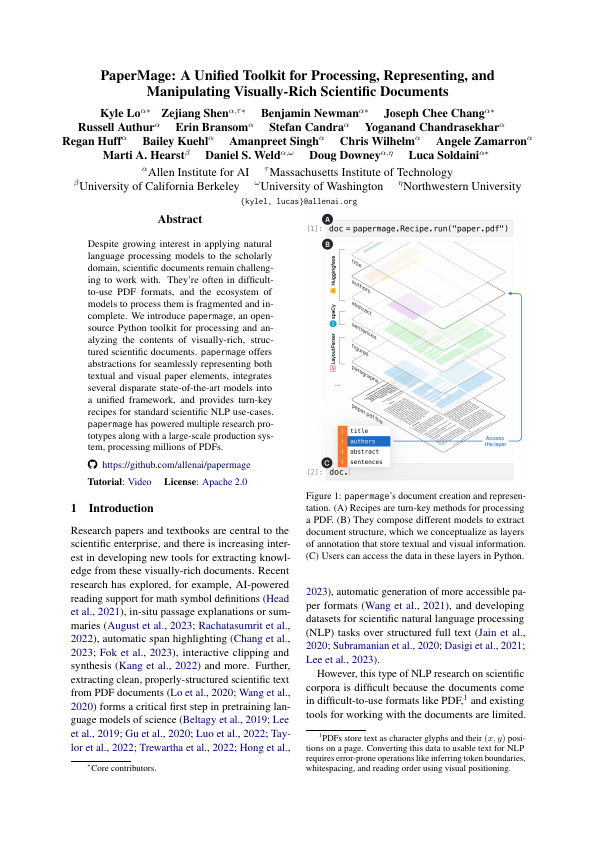

In [28]:
doc.pages[0].images[0]

It looks great! How about visualizing some of the layers in the document? 
For example, let's highlight all tokens in yellow, and put a red box around the abstract.

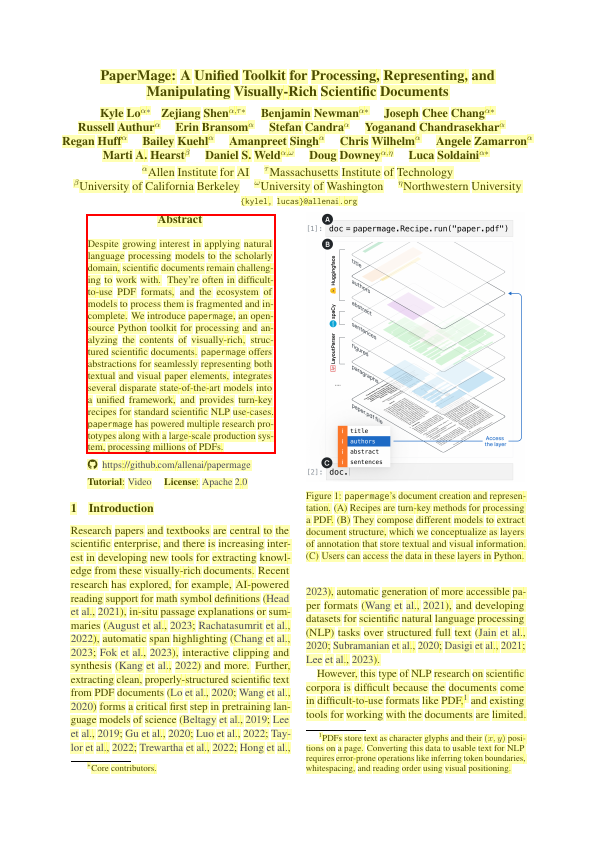

In [29]:
from papermage.visualizers import plot_entities_on_page

page = doc.pages[0]
highlighted = plot_entities_on_page(page.images[0], page.tokens, box_width=0, box_alpha=0.3, box_color="yellow")
plot_entities_on_page(highlighted, page.abstracts)

Let's now look at how we can get sentences in the abstract, and then get the tokens in each sentence:

In [31]:
for sentence in page.abstracts[0].sentences:
    for word in sentence.words[:10]:
        print(word.text)
    break

0
1
Introduction
Research
papers
and
textbooks
are
central
to
